Assignment: Multi-Layer Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import random

In [2]:
#load digits from sklearn.datasets
digits = load_digits()
#get input (data of images) and target values 
input, target = digits.data, digits.target
#create data tuple
data = list(zip(input, target))


#data arrays have not be reshaped because they are already in shape (64,) unlike digits.images (8x8)

In [3]:
#convert data to float32
prepared_data = [(data.astype(np.float32), target) for data, target in data]
#scale values to range [0 to 1]
prepared_data = [(data / 16.0, target) for data, target, in prepared_data]

<Figure size 640x480 with 0 Axes>

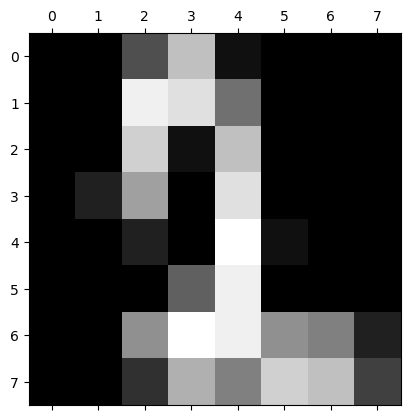

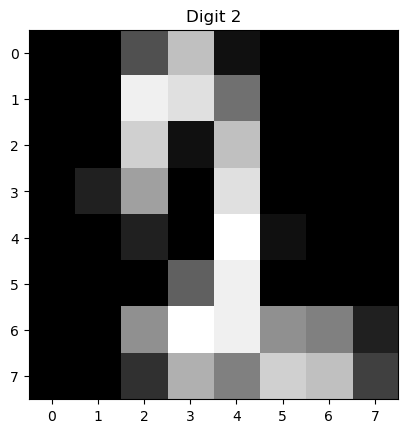

In [4]:
plt.gray()
plt.matshow(digits.images[12])

def plot_digit(data):
    input, target = data
    image = input.reshape(8, 8)

    plt.figure()
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f"Digit {target}")
    plt.show()

plot_digit(prepared_data[12])

In [5]:
print(np.shape(prepared_data[0][0]))
print(type(prepared_data[0][0][0]))
print(prepared_data[0][0][11])

(64,)
<class 'numpy.float32'>
0.9375


In [6]:
#create one-hot encoded vectors
encoder = OneHotEncoder(sparse_output=False)
target_digits = np.arange(0, 10)
one_hot_vectors = encoder.fit_transform(target_digits.reshape(-1, 1))
#combine one-hot-vectors with target digits
target_one_hot = [(vector, digit) for vector, digit in zip(one_hot_vectors, target_digits)]

print(type(target_one_hot))
print(target_one_hot)

<class 'list'>
[(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0), (array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 1), (array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), 2), (array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), 3), (array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), 4), (array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 5), (array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 6), (array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), 7), (array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 8), (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), 9)]


In [7]:
def shuffle_generator(data_target_pairs):

    while True:
        #what about unfortunate shuffles causing same outputs
        random.shuffle(data_target_pairs)
        for data, target in data_target_pairs:
            yield data, target

In [ ]:
gen = shuffle_generator()
print(next(gen))

In [8]:
data_gen = shuffle_generator(prepared_data)
for _ in range(10):
    data, target = next(data_gen)
    print(data, ":", target)

[0.     0.     0.6875 1.     1.     0.625  0.     0.     0.0625 0.875
 1.     0.5625 0.6875 1.     0.0625 0.     0.0625 0.875  0.1875 0.
 0.75   0.875  0.     0.     0.     0.     0.     0.375  1.     0.4375
 0.     0.     0.     0.     0.     0.     0.5    1.     0.3125 0.
 0.     0.     0.     0.     0.     0.75   0.625  0.     0.     0.
 0.125  0.25   0.3125 0.875  0.8125 0.     0.     0.     0.6875 1.
 1.     1.     0.25   0.    ] : 3
[0.     0.     0.0625 0.6875 0.875  0.     0.     0.     0.     0.
 0.5625 1.     0.75   0.     0.     0.     0.     0.0625 1.     0.4375
 0.     0.     0.     0.     0.     0.4375 1.     0.3125 0.3125 0.25
 0.     0.     0.     0.4375 1.     1.     1.     1.     0.3125 0.
 0.     0.     1.     0.8125 0.25   0.8125 0.4375 0.     0.     0.
 0.5625 1.     0.875  1.     0.25   0.     0.     0.     0.0625 0.6875
 0.875  0.5625 0.     0.    ] : 6
[0.     0.     0.625  0.5    0.5    0.25   0.     0.     0.     0.5
 0.9375 0.75   0.875  0.875  0.     0.     

In [16]:
#adjust generator
def shuffle_generator(data_target_pairs, minibatch_size):
    
    while True:
        #shuffle data
        random.shuffle(data_target_pairs)
        #for length of input data, stepsize of batchsize
        for i in range(0, len(data_target_pairs), minibatch_size):
            minibatch_data = []
            minibatch_targets = []

            #create minibatches
            for j in range(minibatch_size):
                if i + j < len(data_target_pairs):
                    data, target = data_target_pairs[i + j]
                    minibatch_data.append(data)

                    #use one_hot_target vectors
                    one_hot_target = np.zeros(10, dtype=np.float32)
                    one_hot_target[target] = 1.0
                    minibatch_targets.append(one_hot_target)
            
            minibatch_data = np.array(minibatch_data, dtype=np.float32)
            minibatch_targets = np.array(minibatch_targets, dtype=np.float32)

            yield minibatch_data, minibatch_targets

        

In [17]:
#testing adjusted generator
generator = shuffle_generator(prepared_data, 4)
test_data, test_target = next(generator)

print(test_data.shape)
print(type(test_data[0][1]))
print(test_target.shape)
print(type(test_target[0][1]))

(4, 64)
<class 'numpy.float32'>
(4, 10)
<class 'numpy.float32'>


In [ ]:
#Sigmoid Activation Function
class Sigmoid_AF():
    def call(self, inputs):
        return 1 / (1+np.exp(-inputs))

In [18]:
#Softmax Activation Function
class Softmax_AF():
    def call(self, inputs):
        e_x = np.exp(inputs)
        return e_x / np.sum(e_x, axis=1, keepdims=True)

In [21]:
#testing softmax
inputs = np.random.randn(4, 10)
output= Softmax_AF().call(inputs)

print(output)
print("------")
print(sum(output[0]))

0.9999999999999999


In [ ]:
#MLP_Layer
class MLP_layer():
    def __init__(self, activation, n_units, input_size):
        self.activation_function = activation
        self.n_units = n_units
        self.input_size = input_size
        weights = np.random.normal(0., 0.2, (n_units * input_size))
        self.weights = weights.reshape(n_units, input_size)
        self.bias = np.zeros((n_units, ))
    
    def forward(self, inputs):
        pre_activations = self.weights @ inputs + np.transpose(self.bias)
        activations = self.activation_function(pre_activations)
        return activations
    

In [ ]:
class MLP():
    def __init__(self, layers):
        self.layer_list = [None]

        self.num_layers 

    def backprop_step(self, x, target, epsilon):
        
        a = [x]
        for layer in self.layer_list[1:]:
            x = layer(x)
            a.append(x)
        y = x #prediction

        sigmoid_prime = a[-1] * (1 - a[-1])
        delta = 2*(y - target) * sigmoid_prime

        output_layer = self.layer_list[-1]
        output_layer.adapt(delta, a[-2], epsilon)

        for l in reversed(range(1, self.num_layers -1)):

            sigmoid_prime = a[l] * (1 - a[l])

            delta = (delta @ self.layer_list[l+1].weights.T) * sigmoid_prime

            self.layer_list[l].adapt(delta, a[l-1], epsilon)

In [ ]:
#einsum 
import numpy as np
batch_size = 32
input_size = 64
output_size = 10

w = np.random.random((input_size, output_size))
a = np.random.random((batch_size, input_size))
b = np.random.random((output_size))

#y = W x a + b

y = np.einsum('io, bi -> bo', w, a) + b